<a href="https://colab.research.google.com/github/chingyaousf/Machine-Learning-3-datasets-analysis/blob/main/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn

**Loading files using Pandas**
**Show data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank-full.csv", delimiter=";")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**split dataset in features and target variable**

In [ ]:
features = ["age" ,"job" ,"marital" ,"education" ,"default" ,"balance" ,"housing" ,"loan" ,"contact" ,"day" ,"month" ,"duration" ,"campaign" ,"pdays" ,"previous" ,"poutcome"]
x = data[features] #feature variable
y = data["y"] #target variable

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Split dataset into training set and test set**

In [ ]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
6149,32,blue-collar,married,secondary,yes,-238,yes,no,unknown,27,may,427,1,-1,0,unknown
12403,34,admin.,single,secondary,no,-478,yes,yes,unknown,27,jun,111,4,-1,0,unknown
21645,32,technician,married,secondary,no,266,yes,no,cellular,19,aug,168,2,-1,0,unknown
29580,36,blue-collar,married,secondary,yes,13,no,yes,cellular,3,feb,150,4,-1,0,unknown
31245,23,student,single,secondary,no,486,no,no,cellular,3,mar,87,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,50,technician,married,tertiary,no,1830,no,no,cellular,14,may,318,3,-1,0,unknown
32511,34,management,divorced,tertiary,no,528,yes,no,cellular,17,apr,233,2,-1,0,unknown
5192,48,management,married,tertiary,no,4191,no,no,unknown,21,may,363,6,-1,0,unknown
12172,45,admin.,married,unknown,no,1783,no,no,unknown,20,jun,11,11,-1,0,unknown


**This code applies label encoding to all categorical columns in both the training and test sets. It uses the LabelEncoder class from scikit-learn to convert each categorical column to numerical values.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# apply label encoding to all categorical columns in the training set
for col in x_train.select_dtypes(include=['object']):
    x_train[col] = le.fit_transform(x_train[col])

# apply label encoding to all categorical columns in the test set
for col in x_test.select_dtypes(include=['object']):
    x_test[col] = le.fit_transform(x_test[col])


**Create Decision Tree classifer object**
# **Train Decision Tree Classifer**

In [ ]:
# fit the decision tree model
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

**Predict the response for test dataset**

In [ ]:
# predict on the test set
y_pred = clf.predict(x_test)

**Let's estimate, how accurately the classifier or model can predict the age of houses (median age for the neighborhood).**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8712769094662342


**Improving Performance**

criterion : optional (default=”gini”) or Choose attribute selection measure

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8860218224712474


**Visualize the Tree**

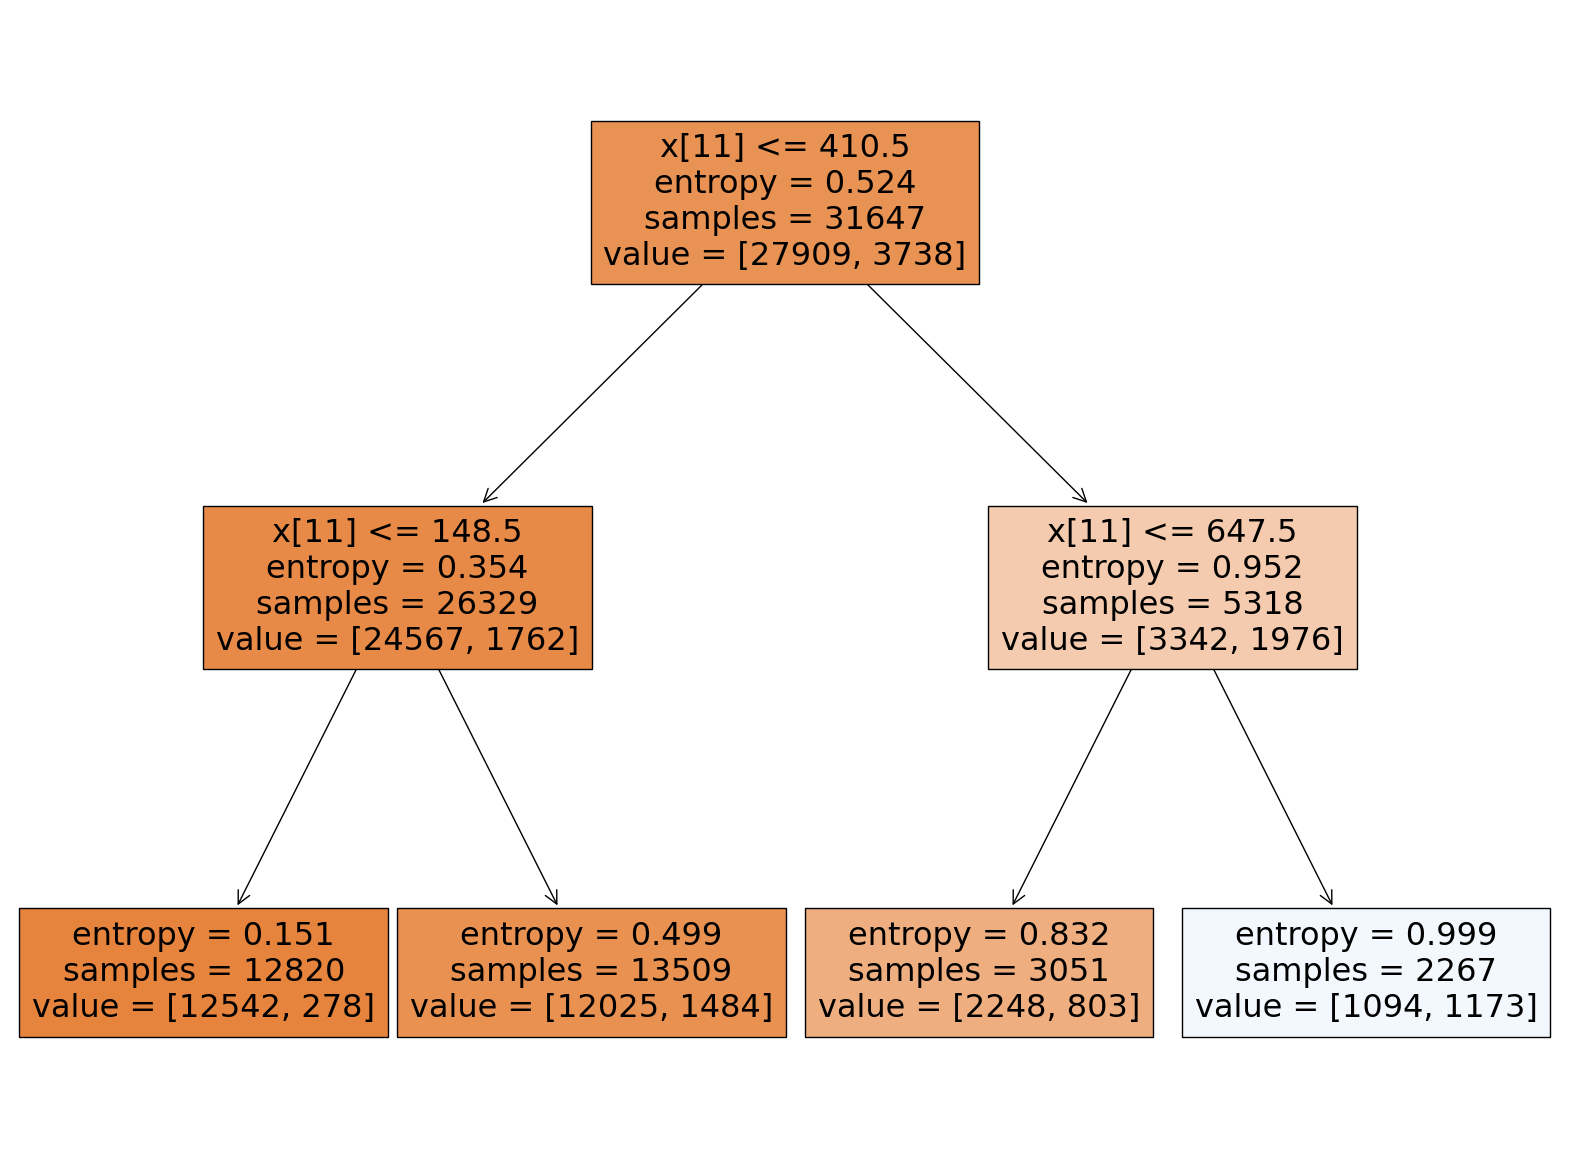

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clf,filled=True)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=3,criterion="entropy" ,random_state=0)

**Let's train this model using the training set and its corresponding labels**

In [ ]:
clf = clf.fit(x_train,y_train)

**Apply the learned model on the test data**

In [ ]:
y_pred = clf.predict(x_test)

**Now Let's See the model's performance on the test data First, we calculate the accuracy. We also show a confution matrix for each class**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.8857269242111472
Confusion [[12013     0]
 [ 1550     1]]


Now let's move on wit precison, recall, and F1-score. ** **Since this is a multi-class classification problem, we take the average for each class (treat it as several binary classification) **bold text**

In [ ]:
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))

Precision: 0.9428592494285926
Recall: 0.5003223726627982
F1_score: 0.47034248441676957


**Or we can get all three in one line of code**

In [ ]:
print("all:", metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))

all: (0.9428592494285926, 0.5003223726627982, 0.47034248441676957, None)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8857269242111472


In [ ]:
from keras.utils import to_categorical

In [ ]:
# create an instance of LabelEncoder
le = LabelEncoder()

# encode y_train and y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# fit the model on the training data
clf.fit(x_train, y_train_encoded)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

**Finally, let's get the AUC as well.**

In [ ]:
# compute the AUC score
print("auc:", metrics.roc_auc_score(to_categorical(y_test_encoded), clf.predict_proba(x_test), average='macro', multi_class='ovo'))

auc: 0.8853384601669704


**Try to plot the ROC curve**

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape #(n_samples, n_classes)

(13564, 1)

In [ ]:
y_test_encoded.shape #(n_samples, n_classes)

(13564,)

In [ ]:
to_categorical(y_test_encoded).shape #(n_samples, n_classes)

(13564, 2)

**class_of_interest =0**

In [ ]:
class_of_interest =0
class_id =0


**Note that to_categorical is used to convert y_test_encoded to a one-hot encoded array, which is necessary for multi-class ROC curve plotting.**

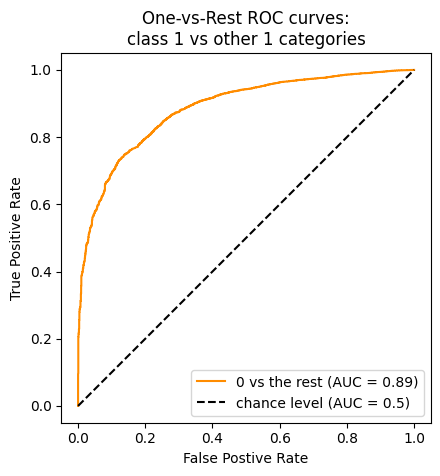

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    to_categorical(y_test_encoded)[:, class_id],
    clf.predict_proba(x_test)[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Postive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nclass 1 vs other 1 categories")
plt.legend()
plt.show()


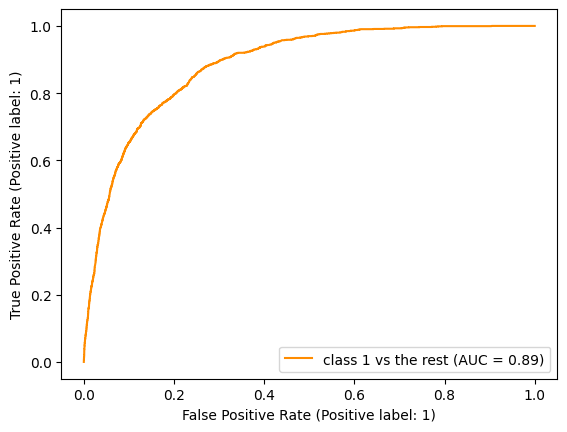

In [ ]:
class_id = 1  # select class 1 (0-indexed) to plot against the rest
RocCurveDisplay.from_predictions(
    to_categorical(y_test_encoded)[:, class_id],
    clf.predict_proba(x_test)[:, class_id],
    name=f"class {class_id} vs the rest",
    color="darkorange",
)


# **Build a naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(x_train, y_train)

GaussianNB()

**Now we can predict output using the learned model**

In [ ]:
y_pred = clf.predict(x_test)

**Now we are ready to evaluate the prediction**

In [ ]:
import sklearn.metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))
print("all:", metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))

Accuracy: 0.841049837805957
Precision: 0.6378645149521884
Recall: 0.6716254575488633
F1_score: 0.6512846929827386
all: (0.6378645149521884, 0.6716254575488633, 0.6512846929827386, None)


# **Neural Networks**

In [ ]:
from sklearn.neural_network import MLPClassifier

**Next, we create the classffier and train MLP on training set**

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=200, solver='sgd')
clf.fit(x_train, y_train)
clf.predict_proba(x_test)

array([[8.73169047e-01, 1.26830953e-01],
       [8.73169047e-01, 1.26830953e-01],
       [7.06940979e-01, 2.93059021e-01],
       ...,
       [9.68637410e-01, 3.13625897e-02],
       [9.99871801e-01, 1.28198602e-04],
       [8.73169047e-01, 1.26830953e-01]])

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
import sklearn.metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))
print("all:", metrics.precision_recall_fscore_support(y_test, y_pred, average='macro'))

Accuracy: 0.8871276909466234
Precision: 0.7324362921061113
Recall: 0.5224502651678176
F1_score: 0.5156104685506941
all: (0.7324362921061113, 0.5224502651678176, 0.5156104685506941, None)


**Let's practice the same in a deep learning library TensorFlow. We don't want run our model on GPU in this exercise**

In [ ]:
import tensorflow as tf
print(tf.__version__) #check thye version of tensorFlow you are using
print(tf.config.list_physical_devices('GPU')) #optional

2.12.0
[]


**Next, we need to build our neural network model using Keras API in tensorFlow**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape #(n_samples, n_classes)

(13564, 1)

# **conver again to y_train to have shape (None, 3), which corresponds to 3 classes otherwise the error will on model.fit(x_train, y_train, epochs=5, batch_size=32)**

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(16)))
model.add(tf.keras.layers.Dense(units=2,activation=tf.nn.softmax))

In [ ]:
print(x_train.shape, y_train.shape)

(31647, 16) (31647, 2)


In [ ]:
print(x_train.dtypes)
print(y_train.dtype)


age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object
float32


In [ ]:
label_types = np.unique(x_train)
print(label_types)
label_types = np.unique(y_train)
print(label_types)

[ -6847  -4057  -3372 ...  81204  98417 102127]
[0. 1.]


**let's train the model using a loss function (same log loss or cross entropy we used in scikit learn) sparse_categorical_crossentropy automatically does the one-hot encoding on the output layer as we talked about in the class.**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy',metrics=['accuracy'])


model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
989/989 [==============================] - 3s 2ms/step - loss: 35.9012 - accuracy: 0.8090
Epoch 2/100
989/989 [==============================] - 2s 2ms/step - loss: 0.4940 - accuracy: 0.8651
Epoch 3/100
989/989 [==============================] - 2s 2ms/step - loss: 0.4560 - accuracy: 0.8726
Epoch 4/100
989/989 [==============================] - 2s 2ms/step - loss: 0.4761 - accuracy: 0.8706
Epoch 5/100
989/989 [==============================] - 2s 2ms/step - loss: 0.4591 - accuracy: 0.8730
Epoch 6/100
989/989 [==============================] - 2s 2ms/step - loss: 0.4395 - accuracy: 0.8739
Epoch 7/100
989/989 [==============================] - 2s 2ms/step - loss: 0.4411 - accuracy: 0.8727
Epoch 8/100
989/989 [==============================] - 2s 2ms/step - loss: 0.4170 - accuracy: 0.8754
Epoch 9/100
989/989 [==============================] - 2s 2ms/step - loss: 0.5162 - accuracy: 0.8728
Epoch 10/100
989/989 [==============================] - 2s 2ms/step - loss: 0.5367 - accur

In [ ]:
predictions= model.predict(x_test)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy', np.sum(y_pred==y_test)/len(y_test))

424/424 [==============================] - 1s 2ms/step
test accuracy 0.8902978472427012


In [ ]:
predictions
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(16)))
model.add(tf.keras.layers.Dense(units=100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=2,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
989/989 [==============================] - 3s 2ms/step - loss: 3.0771 - accuracy: 0.8323
Epoch 2/100
989/989 [==============================] - 2s 2ms/step - loss: 2.2099 - accuracy: 0.8459
Epoch 3/100
989/989 [==============================] - 2s 2ms/step - loss: 2.3138 - accuracy: 0.8457
Epoch 4/100
989/989 [==============================] - 2s 2ms/step - loss: 1.8170 - accuracy: 0.8506
Epoch 5/100
989/989 [==============================] - 2s 2ms/step - loss: 1.6128 - accuracy: 0.8518
Epoch 6/100
989/989 [==============================] - 2s 2ms/step - loss: 1.7751 - accuracy: 0.8524
Epoch 7/100
989/989 [==============================] - 2s 3ms/step - loss: 1.5928 - accuracy: 0.8534
Epoch 8/100
989/989 [==============================] - 2s 2ms/step - loss: 1.6683 - accuracy: 0.8544
Epoch 9/100
989/989 [==============================] - 2s 2ms/step - loss: 1.3822 - accuracy: 0.8581
Epoch 10/100
989/989 [==============================] - 2s 2ms/step - loss: 1.5160 - accura

In [ ]:
predictions= model.predict(x_test)
y_pred = np.argmax(predictions,axis=-1)
print('test accuracy', np.sum(y_pred==y_test)/len(y_test))

424/424 [==============================] - 1s 1ms/step
test accuracy 0.8930993807136538


# **K Nearset Neighbor**

In [ ]:
# KNN Model
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank-full.csv", delimiter=";")
features = ["age" ,"job" ,"marital" ,"education" ,"default" ,"balance" ,"housing" ,"loan" ,"contact" ,"day" ,"month" ,"duration" ,"campaign" ,"pdays" ,"previous" ,"poutcome"]
x = data[features] # Features

# Convert categorical variables to one-hot encoding
x = pd.get_dummies(x)
# Convert target variable to numerical form
y = pd.get_dummies(data['y'])

y = data['y'] # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = KNeighborsClassifier(n_neighbors=2)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_score:", metrics.f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.88329401356532
Precision: 0.6838757395554161
Recall: 0.5652061169709603
F1_score: 0.5836459942339352


In [ ]:
from sklearn.cluster import KMeans
features = ["age" ,"job" ,"marital" ,"education" ,"default" ,"balance" ,"housing" ,"loan" ,"contact" ,"day" ,"month" ,"duration" ,"campaign" ,"pdays" ,"previous" ,"poutcome"]
x = data[features] #feature variable

# **K Means Model**

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=0, n_init="auto")

In [ ]:
kmeans_model = kmeans_model.fit(x)
kmeans_model.labels_

ValueError: ignored

In [ ]:
kmeans_model.cluster_centers_

AttributeError: ignored

In [ ]:
kmeans_model.predict(X_test.head(3))

NameError: ignored